In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from svm_utils import *
from lls_utils import *
from data_analysis_utils import *
from plots_utils import *
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os
import struct

In [2]:
np.random.seed(42)

X = np.zeros((40,2))
y = np.zeros(40)

X[0:20] = np.random.exponential(0.25, (20,2))
y[0:20] = np.ones(20) * (-1)

X[20:40] = np.random.exponential(2, (20,2))
y[20:40] = np.ones(20)

Number of support vectors for C=0.01: 36
Number of margin defining vectors for C=0.01: 2
Number of support vectors for C=1: 13
Number of margin defining vectors for C=1: 3
Number of support vectors for C=100: 9
Number of margin defining vectors for C=100: 4


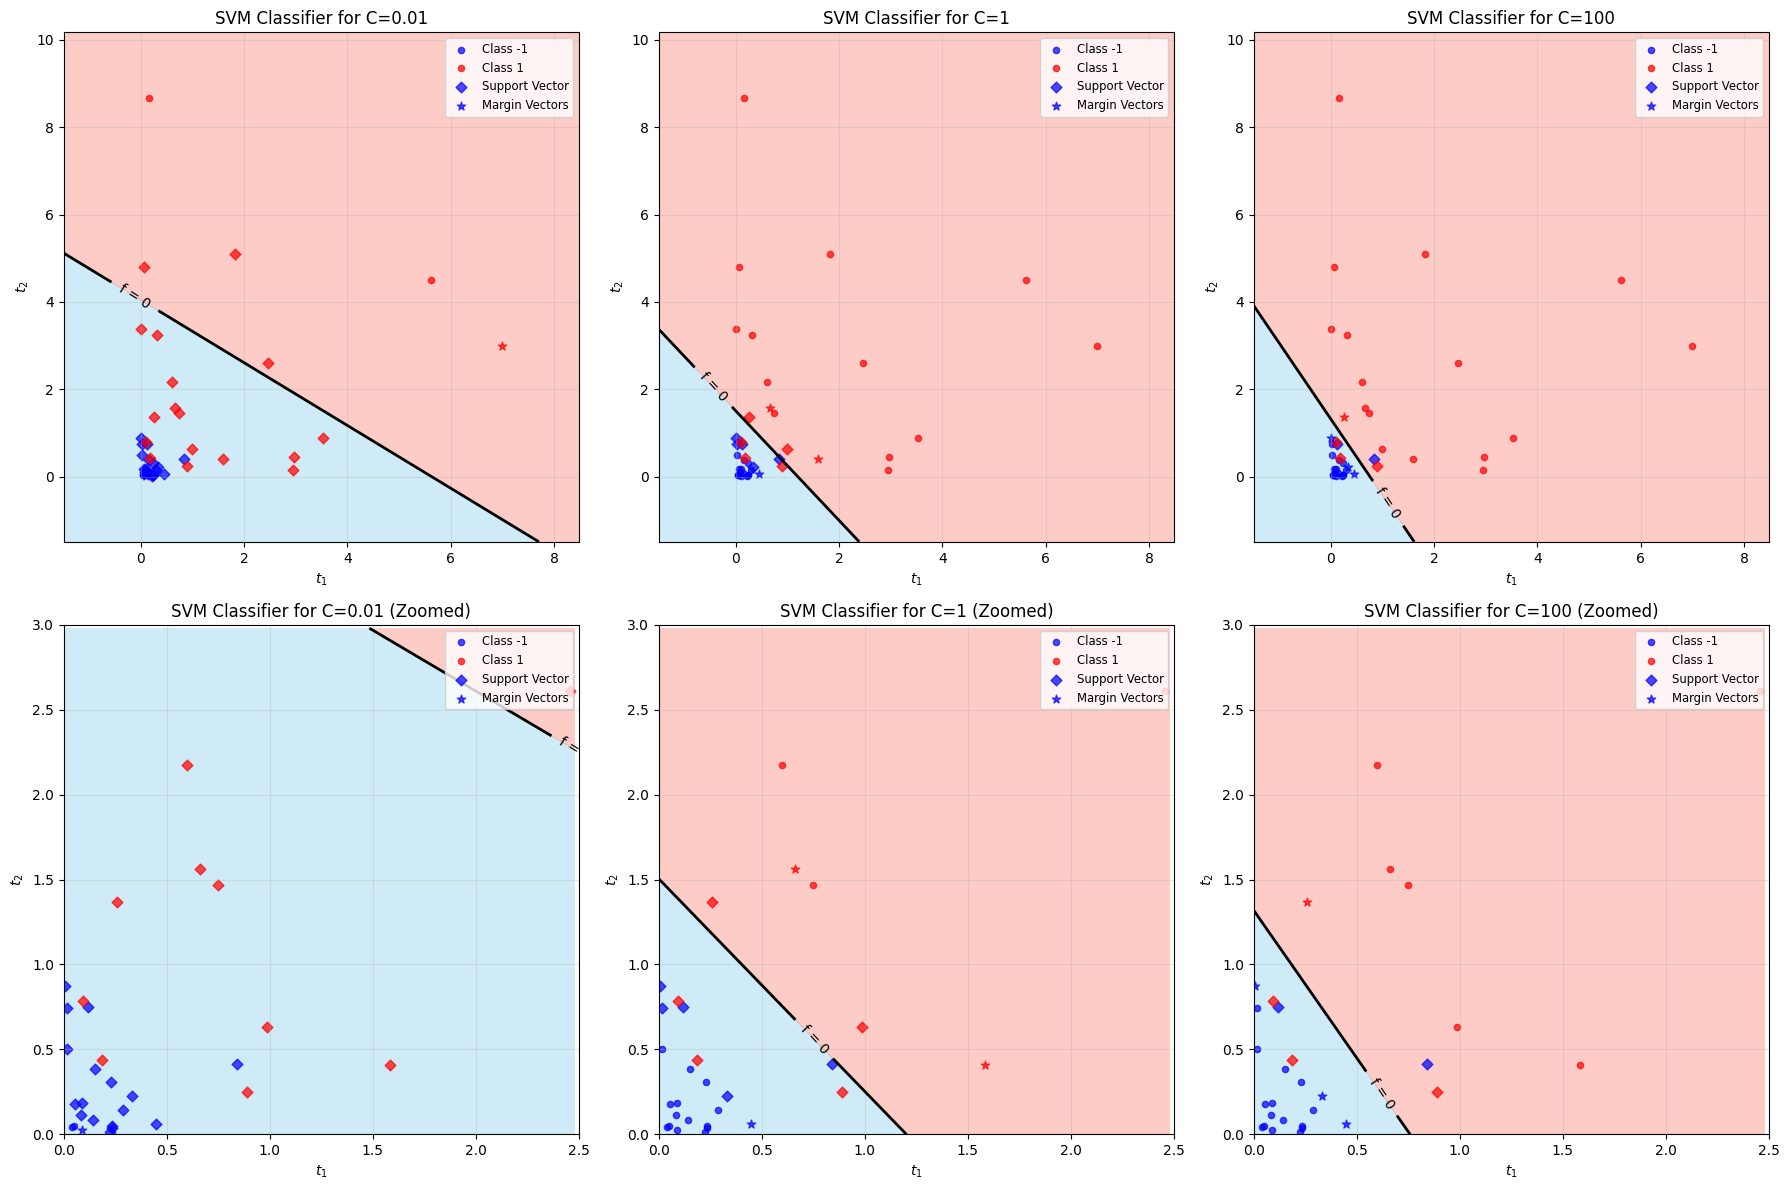

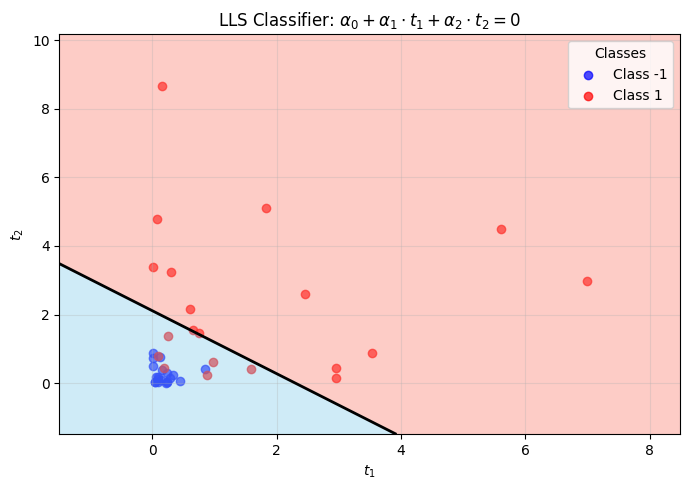

Coefficients: α₀ = -0.5375, α₁ = 0.2332, α₂ = 0.2542


<Axes: title={'center': 'LLS Classifier: $\\alpha_0 + \\alpha_1 \\cdot t_1 + \\alpha_2 \\cdot t_2 = 0$'}, xlabel='$t_1$', ylabel='$t_2$'>

In [3]:
C_values = [0.01, 1, 100]
n_steps = 10000
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

for i, C in enumerate(C_values):
    
    beta, b = smo(X, y, C, n_steps)

    plot_svm_results_2(X, y, beta, b, C, f'SVM Classifier for C={C}', ax=axes[0, i], zoom=False)
    
    plot_svm_results_2(X, y, beta, b, C, f'SVM Classifier for C={C}', ax=axes[1, i], zoom=True)

plt.tight_layout()
plt.show()

alpha = linear_least_squares(X, y)

plot_lls_results(X, y, alpha)

In [4]:
np.random.seed(42)

X_test = np.zeros((2000,2))
y_test = np.zeros(2000)

X_test[0:1000] = np.random.exponential(0.25, (1000,2))
y_test[0:1000] = np.ones(1000) * (-1)

X_test[1000:2000] = np.random.exponential(2, (1000,2))
y_test[1000:2000] = np.ones(1000)

In [5]:
for C in C_values:

    beta, b = smo(X, y, C, n_steps)
    y_pred = classify_svm(X_test, X, y, beta, b)
    _, accuracy = compute_binary_confusion_matrix(y_test, y_pred)

    print(f"The procedure for C:{C} was {accuracy*100}% accurate")

y_pred = classify_lls(X_test, alpha)
_, accuracy = compute_binary_confusion_matrix(y_test, y_pred)

print(f"The procedure for lls was {accuracy*100}% accurate")

The procedure for C:0.01 was 66.0% accurate
The procedure for C:1 was 90.35% accurate
The procedure for C:100 was 89.55% accurate
The procedure for lls was 84.8% accurate


Number of support vectors for C=0.01: 36
Number of margin defining vectors for C=0.01: 2
Number of support vectors for C=1: 13
Number of margin defining vectors for C=1: 3
Number of support vectors for C=100: 8
Number of margin defining vectors for C=100: 3


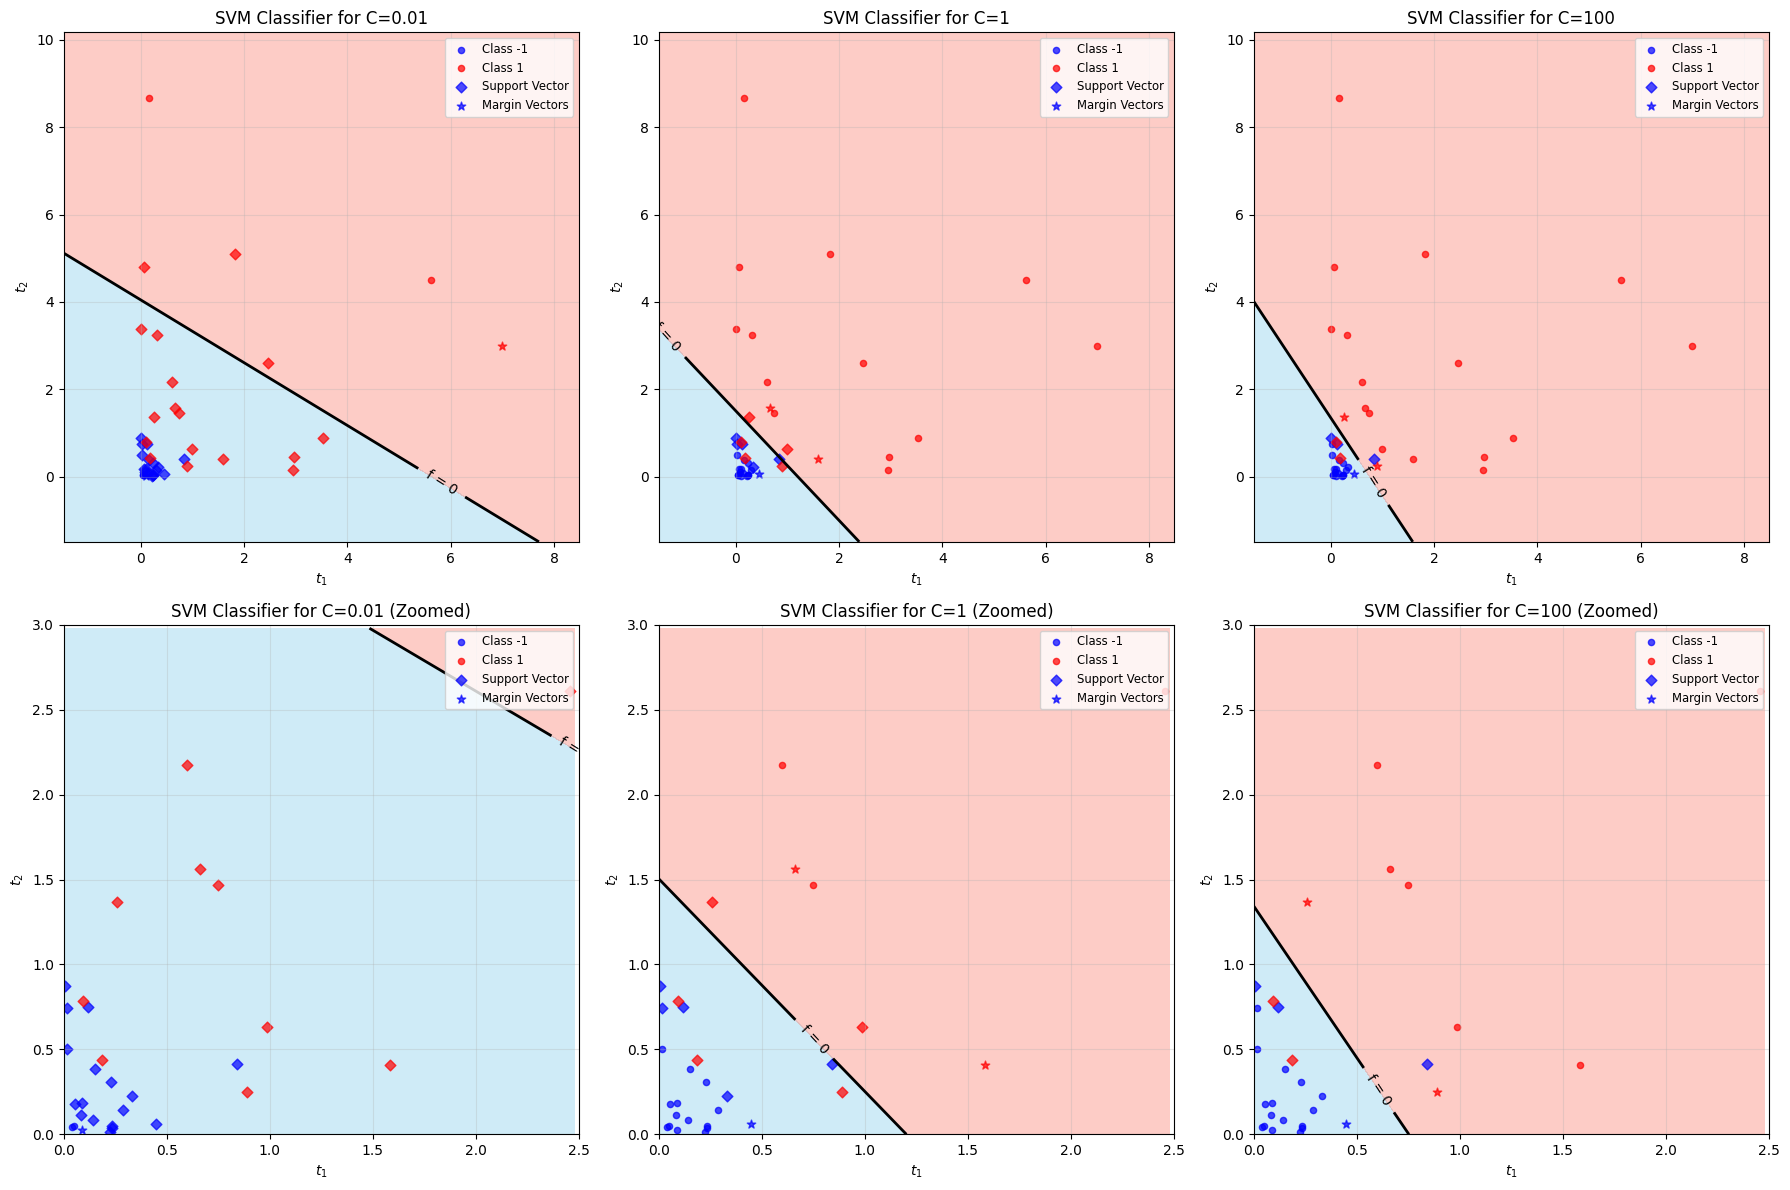

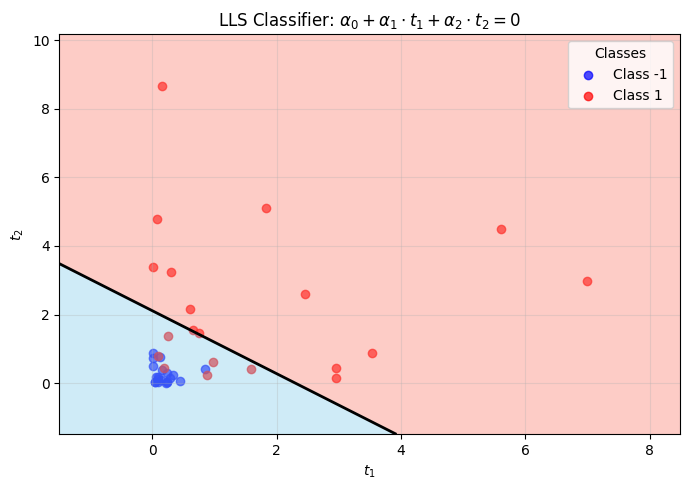

Coefficients: α₀ = -0.5375, α₁ = 0.2332, α₂ = 0.2542


<Axes: title={'center': 'LLS Classifier: $\\alpha_0 + \\alpha_1 \\cdot t_1 + \\alpha_2 \\cdot t_2 = 0$'}, xlabel='$t_1$', ylabel='$t_2$'>

In [6]:
C_values = [0.01, 1, 100]
n_steps = 10000
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  

for i, C in enumerate(C_values):

    beta, b, _ = smo_with_kkt_heuristic(X, y, C, n_steps)
    
    plot_svm_results_2(X, y, beta, b, C, f'SVM Classifier for C={C}', ax=axes[0, i], zoom=False)
    
    plot_svm_results_2(X, y, beta, b, C, f'SVM Classifier for C={C}', ax=axes[1, i], zoom=True)

plt.tight_layout()
plt.show()

alpha = linear_least_squares(X, y)

plot_lls_results(X, y, alpha)

In [7]:
for C in C_values:

    beta, b, _ = smo_with_kkt_heuristic(X, y, C, n_steps)
    y_pred = classify_svm(X_test, X, y, beta, b)
    _, accuracy = compute_binary_confusion_matrix(y_test, y_pred)

    print(f"The procedure for C:{C} was {accuracy*100}% accurate")

y_pred = classify_lls(X_test, alpha)
_, accuracy = compute_binary_confusion_matrix(y_test, y_pred)

print(f"The procedure for lls was {accuracy*100}% accurate")

The procedure for C:0.01 was 66.0% accurate
The procedure for C:1 was 90.35% accurate
The procedure for C:100 was 89.60000000000001% accurate
The procedure for lls was 84.8% accurate


In [8]:
# need to use sqrt to ensure uniformity says wikipedia
inner_r = np.sqrt(np.random.random(50))
inner_theta = np.random.uniform(0, 2*np.pi, 50)
inner_points = np.column_stack([
    inner_r * np.cos(inner_theta),
    inner_r * np.sin(inner_theta)
])

outer_r = np.sqrt(np.random.uniform(1**2, 2**2, 50))
outer_theta = np.random.uniform(0, 2*np.pi, 50)
outer_points = np.column_stack([
    outer_r * np.cos(outer_theta),
    outer_r * np.sin(outer_theta)
])

X_circ = np.zeros((100,2))
y_circ = np.ones(100)
X_circ[0:50] = inner_points
y_circ[0:50] = -1
X_circ[50:100] = outer_points

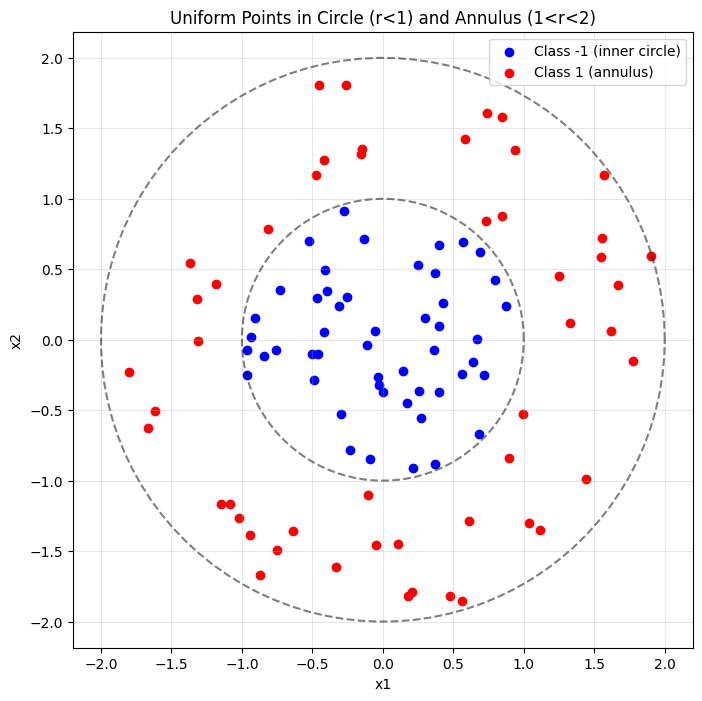

In [10]:
# Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(X_circ[:50, 0], X_circ[:50, 1], c='blue', label='Class -1 (inner circle)')
plt.scatter(X_circ[50:, 0], X_circ[50:, 1], c='red', label='Class 1 (annulus)')

theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5)
plt.plot(2*np.cos(theta), 2*np.sin(theta), 'k--', alpha=0.5)

plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Uniform Points in Circle (r<1) and Annulus (1<r<2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

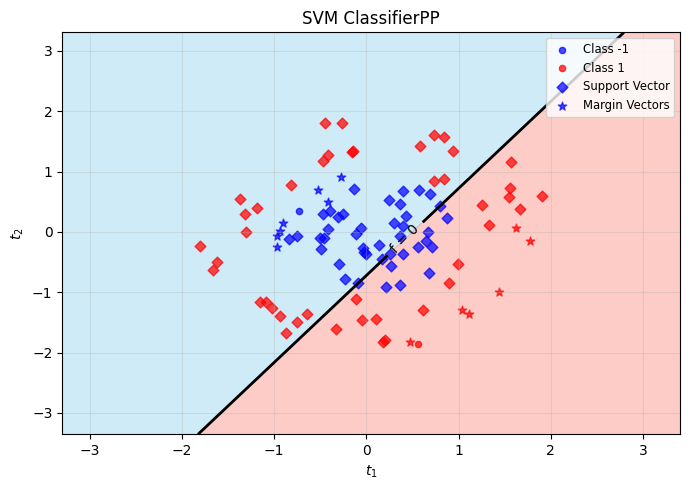

Number of support vectors for C=10: 98
Number of margin defining vectors for C=10: 13


<Axes: title={'center': 'SVM ClassifierPP'}, xlabel='$t_1$', ylabel='$t_2$'>

In [11]:
beta, b = smo(X_circ, y_circ, 10, 10000)
plot_svm_results_2(X_circ, y_circ, beta, b, 10)

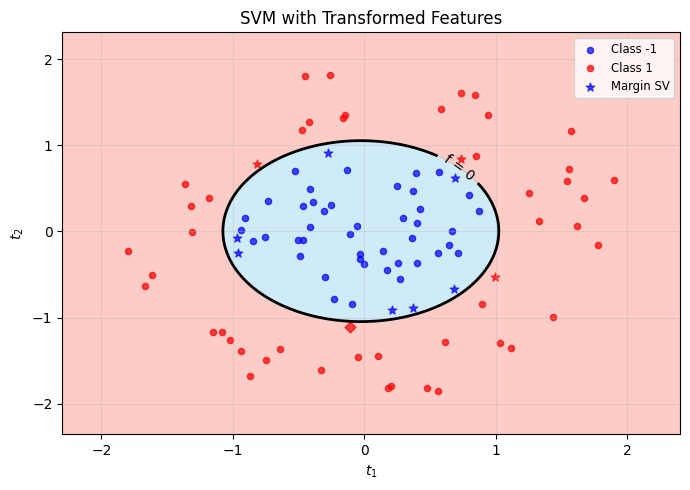

Number of support vectors for C=10: 11
Number of margin defining vectors for C=10: 10


<Axes: title={'center': 'SVM with Transformed Features'}, xlabel='$t_1$', ylabel='$t_2$'>

In [12]:
X_transformed = phi_transform(X_circ)

beta, b = smo(X_transformed, y_circ, C=10, n_steps=10000)

plot_svm_transformed_results(X_circ, y_circ, beta, b, C=10)

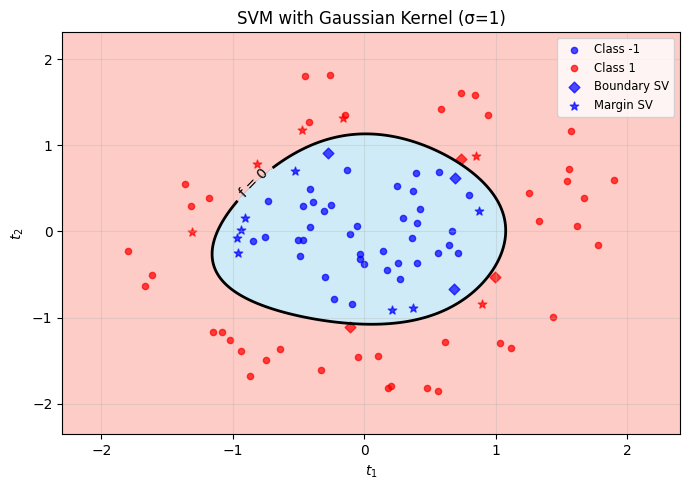

Number of support vectors for C=10, σ=1: 20
Number of margin defining vectors for C=10, σ=1: 14


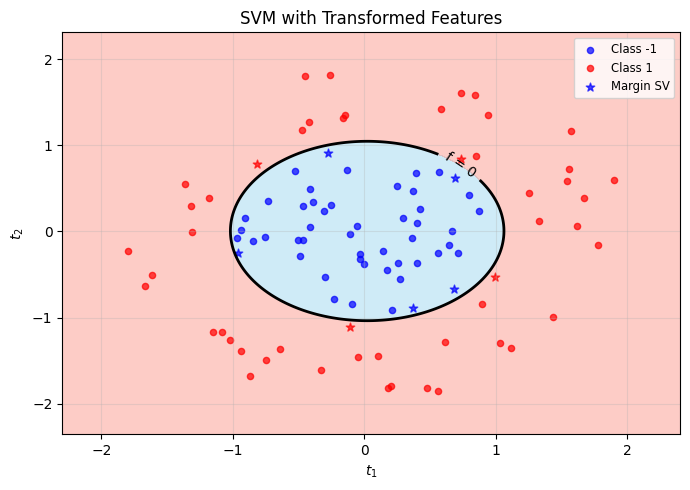

Number of support vectors for C=10: 9
Number of margin defining vectors for C=10: 9


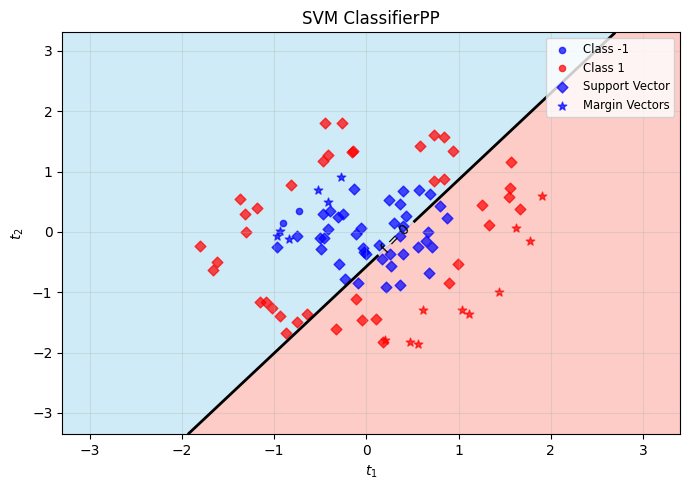

Number of support vectors for C=10: 98
Number of margin defining vectors for C=10: 16


<Axes: title={'center': 'SVM ClassifierPP'}, xlabel='$t_1$', ylabel='$t_2$'>

In [ ]:
def gaussian_kernel(x, y, sigma=1):

    nom = -np.linalg.norm(x - y)**2
    denom = 2 * sigma**2

    result = np.exp(nom/denom)

    return result

beta, b = smo_kernel(X_circ, y_circ, C=10, n_steps=10000, kernel_func=gaussian_kernel)

plot_gaussian_kernel_svm(X_circ, y_circ, beta, b, C=10, sigma=1)

# kernel from phi as feature map for testing
def custom_polynomial_kernel(x, y):
    
    dot_product = np.dot(x, y)
    
    x_squared_sum = np.sum(x**2) 
    y_squared_sum = np.sum(y**2)
    
    return dot_product + x_squared_sum * y_squared_sum

beta, b = smo_kernel(X_circ, y_circ, C=10, n_steps=10000, kernel_func=custom_polynomial_kernel)

plot_svm_transformed_results(X_circ, y_circ, beta, b, C=10)

beta, b = smo_kernel(X_circ, y_circ, C=10, n_steps=10000, kernel_func=lambda x, y: np.dot(x, y))

plot_svm_results_2(X_circ, y_circ, beta, b, C=10)

Loading MNIST data...
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training data shape: (60000, 784)
Test data shape: (10000, 784)
[7 3 8 9 3 9 7 7 5 4 2 5 6 8 1 7 4 8 0 7 9 3 1 7 6 5 3 3 3 6 0 8 4 9 5 1 8
 7 8 8 0 8 2 0 8 5 5 2 2 0 1 5 9 3 0 6 2 2 6 4 0 1 8 4 0 2 4 7 7 4 4 0 1 4
 8 6 0 0 0 9 6 3 6 9 9 4 8 6 6 1 9 5 2 6 3 4 9 1 0 4 2 8 5 4 4 4 4 8 2 4 5
 4 3 1 3 5 4 2 1 1 2 2 8 2 7 0 4 0 6 3 5 2 2 5 1 1 4 5 2 2 9 3 6 2 9 9 5 3
 4 8 7 3 9 7 9 9 0 1 8 0 5 6 0 2 8 0 6 7 1 8 3 8 2 9 4 5 0 1 2 1 3 1 7 8 8
 1 8 8 9 9 8 8 0 1 5 7 4 3 7 4 4 4 1 9 2 2 1 5 0 4 6 5 1 6 6 8 3 2 2 5 2 8
 7 6 0 2 9 9 0 5 3 4 3 3 6 7 2 7 0 5 9 6 8 0 1 5 9 0 6 9 2 7 1 3 4 7 8 8 9
 9 5 0 9 6 6 1 7 9 4 8 5 1 4 7 7 0 2 2 9 5 7 1 0 9 5 4 5 5 7 4 9 6 3 8 1 7
 8 5 4 6 9 2 3 0 7 7 1 4 5 3 9 0 7 1 3 4 0 7 7 9 7 8 3 4 8 4 1 3 9 0 4 0 3
 5 4 5 7 0 8 0 0 2 6 6 4 7 6 1 9 6 0 5 8 7 1 3 9 1 0 5 2 0 6 1 1 8 6 0 0 6
 0 4 9 9

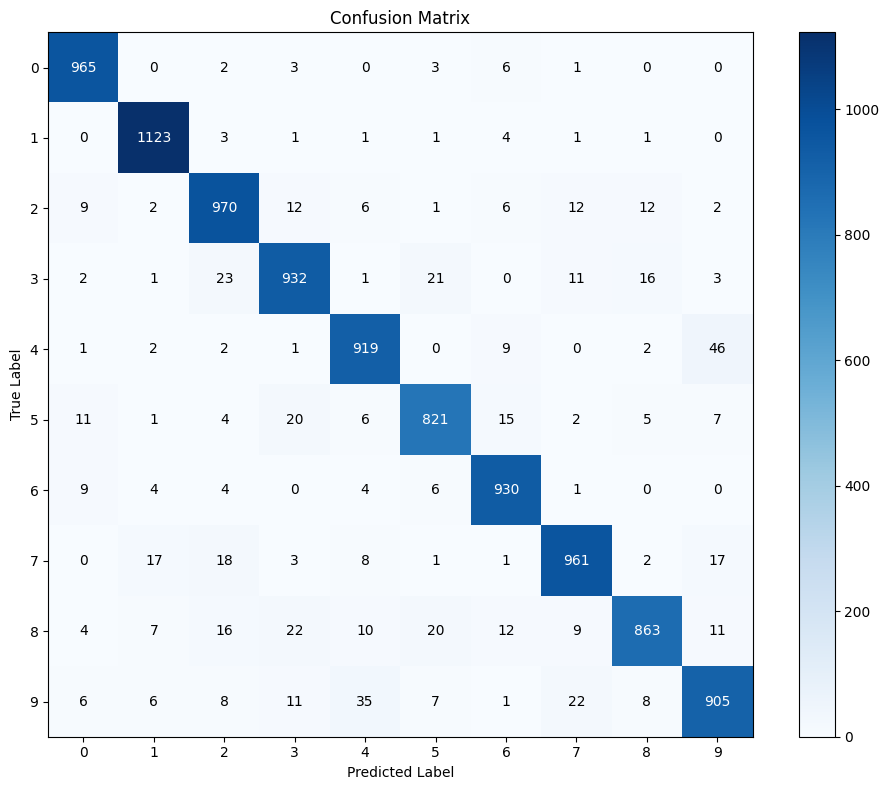

In [ ]:


def load_mnist_images(filename):
    """Load MNIST images from the binary file format"""
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images / 255.0  # normalize to [0, 1]

def load_mnist_labels(filename):
    """Load MNIST labels from the binary file format"""
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

print("Loading MNIST data...")
mnist_dir = 'MNIST/'
X_train = load_mnist_images(os.path.join(mnist_dir, 'train-images-idx3-ubyte'))
y_train = load_mnist_labels(os.path.join(mnist_dir, 'train-labels-idx1-ubyte'))
X_test = load_mnist_images(os.path.join(mnist_dir, 't10k-images-idx3-ubyte'))
y_test = load_mnist_labels(os.path.join(mnist_dir, 't10k-labels-idx1-ubyte'))

# flatten the images (28x28 -> 784 features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat)

print(f"Training data shape: {X_train_flat.shape}")
print(f"Test data shape: {X_test_flat.shape}")

# choose 500 random samples for cross-validation
np.random.seed(42)  
indices_500 = np.random.choice(X_train_flat.shape[0], size=500, replace=False)

X_cv = X_train_flat[indices_500]
y_cv = y_train[indices_500]
print(y_cv)
print(f"Cross-validation data shape: {X_cv.shape}")

# the parameter grid for cross-validation
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001]
}

# SVC with Gaussian/RBF kernel
svc = SVC(kernel='rbf')

print("Performing 5-fold cross-validation...")
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_cv, y_cv)

print("\nCross-validation results:")
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Parameters: {params}, Mean Score: {mean_score:.4f}")

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

indices_2000 = np.random.choice(X_train_flat.shape[0], size=2000, replace=False)
X_train_2000 = X_train_flat[indices_2000]
y_train_2000 = y_train[indices_2000]

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']
print(f"\nTraining SVC with C={best_C}, gamma={best_gamma} on 2000 samples...")

best_svc = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
best_svc.fit(X_train_2000, y_train_2000)

print("Evaluating on the test set...")
y_pred = best_svc.predict(X_test_flat)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(cm)

print("\nClassification report:")
report = classification_report(y_test, y_pred)
print(report)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('confusion_matrix.png')
print("Confusion matrix saved as 'confusion_matrix.png'")